# Multinomial Logistic Regression (SoftMax) Exercise

This exercise will guide you in extending the Binary Logistic Regression Model to a Multinomial Logistic Regression model that can handle more than 2 classes. It is more commonly refered to as the SoftMax regression.

**You will learn to:**
- Build the general architecture of a Multinomial Logistic Regression (SoftMax) Model.
    - Initializing Parameters/Weights
    - Implement the activation function that maps your raw scores to a probability distribution over all classes.
    - Calculating the Cost/Loss/Objective Function
    - Computing for the gradients of the Loss function with respect to the parameters
    - Implement gradient descent to update the paramters

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.style.use('ggplot')

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

# Data
As with the logistic regression exercise, we will use a toy dataset, so we can visualize our data and model predictions in 2D. The data generated below are sampled from three Gaussian distributions centered at $(-5, 0)$, $(0, 2)$ and $(-1, -4)$.

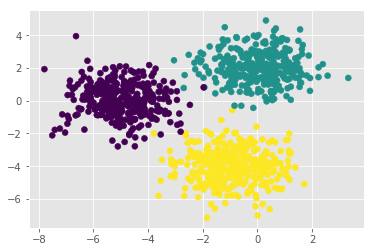

In [2]:
np.random.seed(1)
from sklearn.datasets import make_blobs
centers = [[-5, 0], [0, 2], [-1, -4]]
X, y = make_blobs(n_samples=1000, centers=centers)

plt.scatter(X[:,0], X[:,1],c=y)

$X \in \mathbb{R}^{N,D}$ - like the binary logistic regression, our data is also represented as a matrix with $N$ rows and $D$ columns, where each row is a $D$-dimensional feature vector representing an instance / example in our dataset $(x_i \in \mathbb{R}^D)$. In this particular example, $D=2$.



$y \in \{0,..,C\}^N$ - Given $C$ distinct classes, the prediction target is represented as a vector of length $N$ and each example $y_i$ is a scalar that can take on a value from 0 to $C$.

**Note that the math expresses our target variable $y_i$ as a one-hot encoding vector, where it has a value of 1 corresponding to the correct class and 0 everywhere else. In practice, we represent $y_i$ as a scalar value denoting the index of the correct class instead. This is because it is not computationally and memory efficient to treat each $y_i$ as a vector, specially for large number of classes, when almost all of its value are 0.** 

In [3]:
print("The shape of X:", X.shape)
print("The shape of y:", y.shape)
print("\nFirst 5 examples:")
for i in range(5):
    print("X[{}] = {}\t y[{}] = {}".format(i, X[i], i, y[i]))

The shape of X: (1000, 2)
The shape of y: (1000,)

First 5 examples:
X[0] = [-5.27584606  1.22895559]	 y[0] = 0
X[1] = [0.16466507 2.77817418]	 y[1] = 1
X[2] = [0.51441156 1.98274913]	 y[2] = 1
X[3] = [-5.50897228 -0.16648595]	 y[3] = 0
X[4] = [-1.9613638  -5.42701563]	 y[4] = 2


# Multinomial Logistic Regression (SoftMax Regression)

###  Initialize Weights! We initialize the weights with small random values and the biases are initialized to zero.
**Open `multinomial_logistic_regression.py`, and fill in the code for the function `initialize_weights`.**

In [4]:
from multinomial_logistic_regression import MultinomialLogisticRegression

In [5]:
np.random.seed(1)
classifier = MultinomialLogisticRegression()
classifier.initialize_weights(5,5)
print("Weights vector:")
print(classifier.params["W"])
print("Bias:")
print(classifier.params["b"])

Weights vector:
[[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
 [-0.02301539  0.01744812 -0.00761207  0.00319039 -0.0024937 ]
 [ 0.01462108 -0.02060141 -0.00322417 -0.00384054  0.01133769]
 [-0.01099891 -0.00172428 -0.00877858  0.00042214  0.00582815]
 [-0.01100619  0.01144724  0.00901591  0.00502494  0.00900856]]
Bias:
[0. 0. 0. 0. 0.]


**Sanity Check**: 

Expected output:
```
Weights vector:
[[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
 [-0.02301539  0.01744812 -0.00761207  0.00319039 -0.0024937 ]
 [ 0.01462108 -0.02060141 -0.00322417 -0.00384054  0.01133769]
 [-0.01099891 -0.00172428 -0.00877858  0.00042214  0.00582815]
 [-0.01100619  0.01144724  0.00901591  0.00502494  0.00900856]]
Bias:
[ 0.  0.  0.  0.  0.]
```

### Compute for the predictions using the current weights
**First let's implement the `softmax` function that converts our scores to probabilities**

In [6]:
np.random.seed(1)
classifier = MultinomialLogisticRegression()
probs = classifier.softmax(np.random.randn(3,5))
print("Probabilities of belonging to each class")
print(probs)

Probabilities of belonging to each class
[[0.56862917 0.06077185 0.06606977 0.0383178  0.26621141]
 [0.01185074 0.67772435 0.05529718 0.16287255 0.09225519]
 [0.48184163 0.01423021 0.08089001 0.07605473 0.34698342]]


**Sanity Check**: 

Expected output:
```
Probabilities of belonging to each class
[[ 0.56862917  0.06077185  0.06606977  0.0383178   0.26621141]
 [ 0.01185074  0.67772435  0.05529718  0.16287255  0.09225519]
 [ 0.48184163  0.01423021  0.08089001  0.07605473  0.34698342]]

```

Let's test your implementation again on a different scale of values.

In [7]:
np.random.seed(1)
classifier = MultinomialLogisticRegression()
probs = classifier.softmax(np.array([[1001,1002,1003,1004,1005],[3,4,5,6,7]]))
print("Probabilities of belonging to each class")
print(probs)

Probabilities of belonging to each class
[[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
 [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]]


**Sanity Check**: 

Expected output:
```
Probabilities of belonging to each class
[[ 0.01165623  0.03168492  0.08612854  0.23412166  0.63640865]
 [ 0.01165623  0.03168492  0.08612854  0.23412166  0.63640865]]
```

Are you getting numerical overflow errors or `nan` values?

This is because of exponentiating large values can easily lead to numerical overflows so in practice softmax is implemented a little bit differently.

First, you must show mathematically that softmax is invariant to constant offsets in the input. More specifically, given any input vector $x$ and any constant $c$,

$$\text{softmax}(x) = \text{softmax}(x+c)$$

#################################################################################

**Double click this cell and type your answer below:**

#################################################################################

\begin{align}
    \text{softmax}(x)_i &= \frac{e^{x_i}}{\sum_j e^{x_j}} \\
    &= \frac{e^{x_i}}{\sum_j e^{x_j}} * \frac{e^{c}}{e^{c}}\\
    &= \frac{e^{x_i+c}}{\sum_j e^{x_j+c}}\\
    &= \text{softmax}(x+c)_i\\
\end{align}

#################################################################################

**END**

#################################################################################

In implementing the softmax function, we use this property and choose $c = -\max(x)$ to make it more numerically stable.

**We can now implment the `predict` function, which takes in an input vector and outputs index of the correct class.**

In [8]:
np.random.seed(1)
classifier = MultinomialLogisticRegression()
classifier.initialize_weights(5,3)

print("Predictions")
print(classifier.predict(np.random.randn(10,5)))

Predictions
[2 1 2 2 1 1 0 2 0 1]


**Sanity Check**: 

Expected output:
```
Predictions
[2 1 2 2 1 1 0 2 0 1]
```

### Compute for the losses corresponding to the current predictions.
**Implement `loss` function which should output the losses as well as its the gradients.**

In [9]:
np.random.seed(1)
classifier = MultinomialLogisticRegression()
classifier.initialize_weights(5,3)
dummy_labels = [0,1,2,1,0]
loss, grads = classifier.loss(np.random.randn(5,5),dummy_labels)

print("Loss:",loss)
print("Gradient['W']",grads['W'])
print("Gradient['b']",grads['b'])

Loss: 1.0972951165111342
Gradient['W'] [[-0.01192344  0.11655022 -0.10462678]
 [ 0.21354341 -0.19261624 -0.02092716]
 [ 0.0410376  -0.13354762  0.09251001]
 [-0.26650623  0.14255741  0.12394882]
 [-0.12784662  0.09548254  0.03236408]]
Gradient['b'] [-0.07185451 -0.06396272  0.13581723]


**Sanity Check**: 

Expected output:
```
Loss: 1.09729511651
Gradient['W'] [[-0.01192344  0.11655022 -0.10462678]
 [ 0.21354341 -0.19261624 -0.02092716]
 [ 0.0410376  -0.13354762  0.09251001]
 [-0.26650623  0.14255741  0.12394882]
 [-0.12784662  0.09548254  0.03236408]]
Gradient['b'] [-0.07185451 -0.06396272  0.13581723]

```

### Lastly, we use gradient descent algorithm in order to train our model.
**Implement gradient descent in the `train` function.**

In [10]:
np.random.seed(1)
classifier = MultinomialLogisticRegression()
loss_history = classifier.train(X, y, learning_rate=0.9, lambda_reg=0.0, num_iters=2000, batch_size=256, verbose=True)

iteration 100 / 2000: loss 0.013159
iteration 200 / 2000: loss 0.016051
iteration 300 / 2000: loss 0.019418
iteration 400 / 2000: loss 0.011900
iteration 500 / 2000: loss 0.006884
iteration 600 / 2000: loss 0.021871
iteration 700 / 2000: loss 0.029994
iteration 800 / 2000: loss 0.009977
iteration 900 / 2000: loss 0.015705
iteration 1000 / 2000: loss 0.012317
iteration 1100 / 2000: loss 0.024872
iteration 1200 / 2000: loss 0.015629
iteration 1300 / 2000: loss 0.005623
iteration 1400 / 2000: loss 0.006077
iteration 1500 / 2000: loss 0.021168
iteration 1600 / 2000: loss 0.019760
iteration 1700 / 2000: loss 0.020992
iteration 1800 / 2000: loss 0.008539
iteration 1900 / 2000: loss 0.013216
iteration 2000 / 2000: loss 0.006798


**Sanity Check:**

Expected output:
```
iteration 100 / 2000: loss 0.013159
iteration 200 / 2000: loss 0.016051
iteration 300 / 2000: loss 0.019418
iteration 400 / 2000: loss 0.011900
iteration 500 / 2000: loss 0.006884
iteration 600 / 2000: loss 0.021871
iteration 700 / 2000: loss 0.029994
iteration 800 / 2000: loss 0.009977
iteration 900 / 2000: loss 0.015705
iteration 1000 / 2000: loss 0.012317
iteration 1100 / 2000: loss 0.024872
iteration 1200 / 2000: loss 0.015629
iteration 1300 / 2000: loss 0.005623
iteration 1400 / 2000: loss 0.006077
iteration 1500 / 2000: loss 0.021168
iteration 1600 / 2000: loss 0.019760
iteration 1700 / 2000: loss 0.020992
iteration 1800 / 2000: loss 0.008539
iteration 1900 / 2000: loss 0.013216
iteration 2000 / 2000: loss 0.006798
```

Text(0, 0.5, 'Loss')

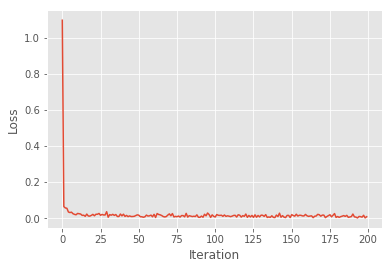

In [11]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [12]:
Y_train_pred = classifier.predict(X)
print("Train accuracy: {} %".format(np.mean((Y_train_pred == y)) * 100))

Train accuracy: 99.6 %


## Let's visualize the decision boundaries.

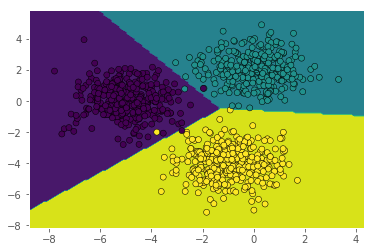

In [13]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = classifier.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

## Let's add $L_2$ regularization and see what happens to the decision boundaries

Train accuracy: 99.5 %


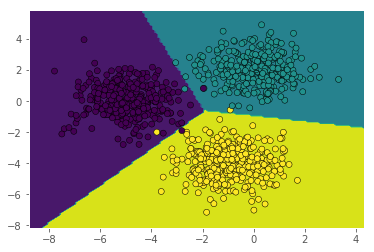

In [14]:
classifier = MultinomialLogisticRegression()
loss_history = classifier.train(X, y, learning_rate=0.9, lambda_reg=0.1, num_iters=2000, batch_size=256, verbose=False)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T
Z = classifier.predict(x_test)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

Y_train_pred = classifier.predict(X)
print("Train accuracy: {} %".format(np.mean((Y_train_pred == y)) * 100))

We can observe that the training accuracy went down a little bit and the decision boundaries have more equal angles across the classes.